In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt 
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import altair as alt
print('Modules are imported.')

Modules are imported.


In [2]:
import io
import requests
url='https://data.brasil.io/dataset/covid19/caso_full.csv.gz'
s=requests.get(url).content


In [3]:
with open('data/covidio.full.csv.gz', 'wb') as f:
    f.write(s)

In [4]:
df = pd.read_csv('data/covidio.full.csv.gz')

In [5]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [6]:
df_states = df[(df['is_repeated'] == False) & (df.place_type == 'state')].sort_values('date', ascending=True).set_index('date').reindex()
df_cities = df[(df['is_repeated'] == False) & (df.place_type == 'city')].sort_values('date', ascending=True).set_index('date').reindex()

In [7]:
df_states.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-02-25,NaN,35.0,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2020-02-26,NaN,35.0,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
2020-02-27,NaN,35.0,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,SP,0,0
2020-02-28,NaN,35.0,202009,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,SP,1,0
2020-02-29,NaN,35.0,202009,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,SP,0,0


In [8]:
df_cities.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-02-25,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
2020-02-26,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
2020-02-27,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0
2020-02-28,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0
2020-02-29,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0


[]

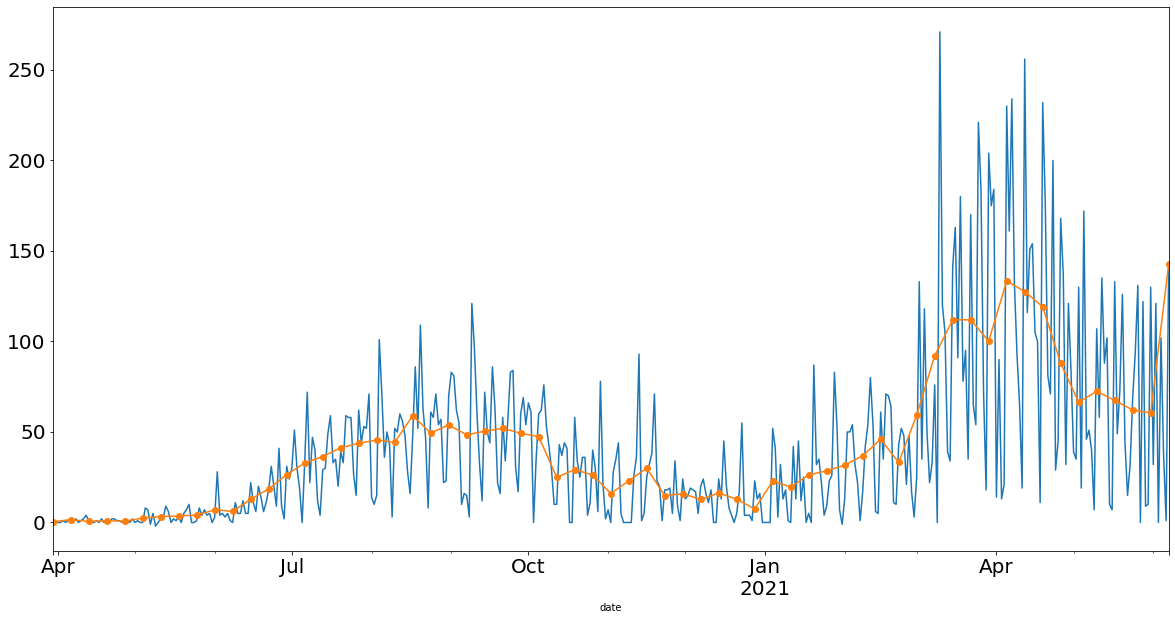

In [15]:
import matplotlib.dates as mdates
#ax = df_states[df_states.state=='AM'].loc['2020-06-01':]['new_deaths'].resample('M').mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
ax = df_states[df_states.state=='GO'].loc['2020-04-01':]['new_deaths'].plot(figsize=(20,10), fontsize=20, )
ax = df_states[df_states.state=='GO'].loc['2020-04-01':]['new_deaths'].resample('W').mean().plot(figsize=(20,10), fontsize=20, marker='o', linestyle='-')
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
#df_states[df_states.state=='AM'].loc['2020-06-01':]['new_deaths'].resample('M').mean().plot(kind='bar', figsize=(20,10), fontsize=20)
ax.plot()
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())


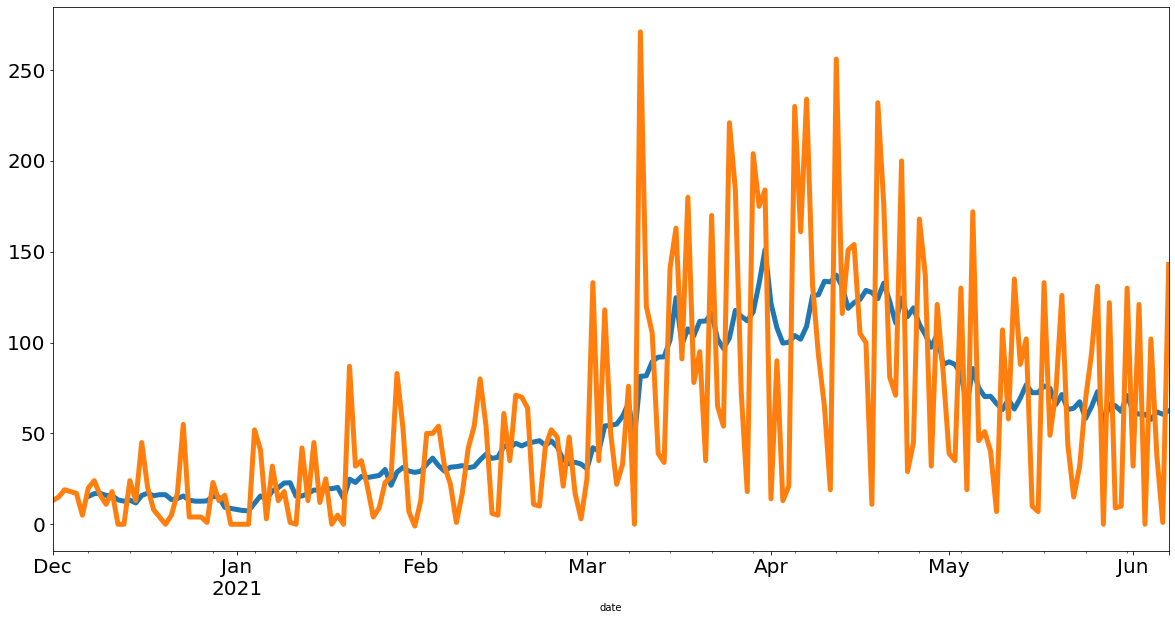

In [10]:
_ = df_states[df_states.state=='GO'].loc['2020-12-01':]['new_deaths'].rolling(7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
_ = df_states[df_states.state=='GO'].loc['2020-12-01':]['new_deaths'].plot(figsize=(20,10), linewidth=5, fontsize=20)

#opsd_daily[data_columns].resample('M').mean()

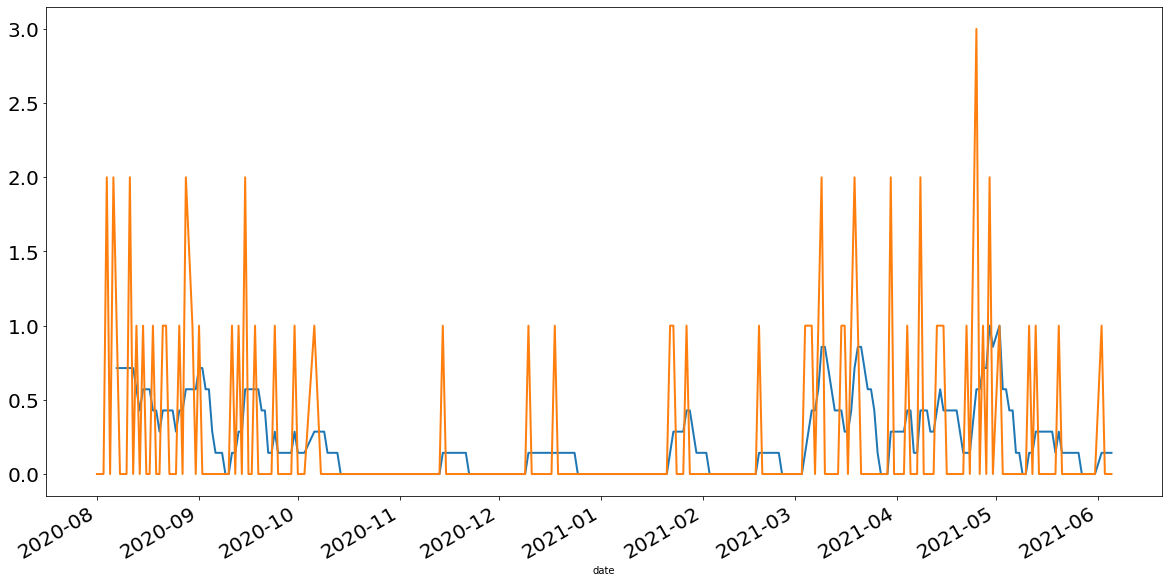

In [11]:
_ = df_cities[df_cities.city=='Serrana'].loc['2020-08-01':]['new_deaths'].rolling(7).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
_ = df_cities[df_cities.city=='Serrana'].loc['2020-08-01':]['new_deaths'].plot(figsize=(20,10), linewidth=2, fontsize=20)

In [12]:
df_cities.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-02-25,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
2020-02-26,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
2020-02-27,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0
2020-02-28,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0
2020-02-29,São Paulo,3550308.0,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0


<AxesSubplot:xlabel='date'>

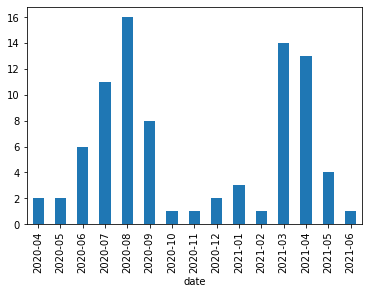

In [17]:
df_serrana = df_cities[df_cities.city=='Serrana'].copy() 
per = df_serrana.index.to_period("M")
g = df_serrana.groupby(per)

g['new_deaths'].sum().plot(kind='bar')
#_ = g[g.city=='Serrana'].Grouper(freq='M')['new_deaths'].plot(figsize=(20,10), linewidth=2, fontsize=20)